<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/05_LinearRegressionIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Introduction to Linear Regression

In this course, we will learn about a very powerful tool for statistics: Linear Regression. We will understand and learn how to use regression as well as test results and analyze residuals found. We will also understand what is the covariance and how to interpret. In the ened, we will apply our knowledge in a practical example.


In this project, we will use a dataset from PNAD 2015. First, let's import this data using:

In [1]:
import pandas as pd

dataset = pd.read_csv('dados.csv')

dataset.head( )

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In this dataset, we have information regarding:

*   State from Brazil (UF)
*   Sex (Sexo)
*   Age (Idade)
*   Color (Cor)
*   Years of study (Anos de estudo)
*   Monthly income (Renda)
*   Height (Altura)

For some of these, our data is encoded. The code can be seen in the following:


**State from Brazil:**

In [2]:
map_state = {11: "Rondônia",
             12: "Acre",
             13: "Amazonas",
             14: "Roraima",
             15: "Pará",
             16: "Amapá",
             17: "Tocantins",
             21: "Maranhão",
             22: "Piauí",
             23: "Ceará",
             24: "Rio Grande do Norte",
             25: "Paraíba",
             26: "Pernambuco",
             27: "Alagoas",
             28: "Sergipe",
             29: "Bahia",
             31: "Minas Gerais",
             32: "Espírito Santo",
             33: "Rio de Janeiro",
             35: "São Paulo",
             41: "Paraná",
             42: "Santa Catarina",
             43: "Rio Grande do Sul",
             50: "Mato Grosso do Sul",
             51: "Mato Grosso",
             52: "Goiás",
             53: "Distrito Federal"}

**Sex:**

In [3]:
map_sex = {0: "M",
           1: "F"}

**Years of study:**

In [4]:
map_years_study = {1 : "0 years",
                   2 : "1 year",
                   3 : "2 years",
                   4 : "3 years",
                   5 : "4 years",
                   6 : "5 years",
                   7 : "6 years",
                   8 : "7 years",
                   9 : "8 years",
                   10: "9 years",
                   11: "10 years",
                   12: "11 years",
                   13: "12 years",
                   14: "13 years",
                   15: "14 years",
                   16: "15 years",
                   17: "Not found",
                   18: "Not aplicable"}

**Color:**

In [5]:
map_color = {0: "Indigenous",
             2: "White",
             4: "Black",
             6: "Yellow",
             8: "Pardo",
             9: "Not declared"}

This dataset can be found from IBGE website. However, some data treatment was performed before:


*   Invalid entries for monthly income were eliminated (999 999 999 999).
*   Missing entries for monthly income were eliminated.
*   We considered only data from a person of reference in each house.


# Our first regression

Let's draw our first linear regression. A linear regression can be used to define the best line to fit a scattered data (with a dependent variable and one or more independent variable. 

For instance, by intuition, we think that the family spending depends on the family income. Let's see how these are related using a scatter plot:

In [6]:
data_income = {
    'Spending' : [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849],
    'Income' : [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632]
}

df = pd.DataFrame(data_income)

df.head( )

,Spending,Income
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


Let's get some descriptive statistics for our data:

In [7]:
df.describe( )

,Spending,Income
count,10.000000,10.000000
mean,2212.400000,6806.600000
std,859.882447,2939.600283
min,849.000000,1632.000000
25%,1448.500000,4311.500000
50%,2598.500000,8162.500000
75%,2881.250000,8760.500000
max,3074.000000,9915.000000


Drawing a boxplot for our data:

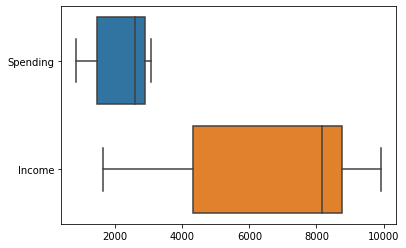

In [8]:
import seaborn as sns

ax = sns.boxplot(data = df, orient = 'h')

Now, let's use a plot from seaborn named *lmplot( )*:

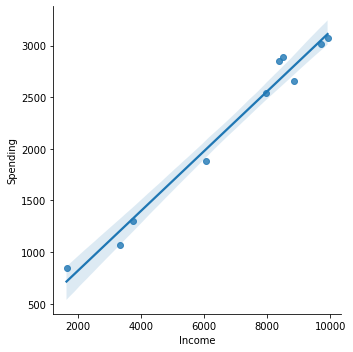

In [9]:
ax = sns.lmplot(x = 'Income', y = 'Spending', data = df)

We can see that the relationship between the data points (pair of income and spending for a family) is very close to a linear relation. Also, the *lmplot( )* already draws a line that fits to this data.

Our goal from linear regression is to precisely define this line.

But how do we evaluate if there is a linear relation between our data? We can use the correlation:

In [10]:
df.corr( )

,Spending,Income
Spending,1.000000,0.989013
Income,0.989013,1.000000


Here, we have a matrix with the correlation between variables. The diagonal of this matrix is always a vector of ones, since correlation between two variables that are the same is always one (which is the maximum value). Here, we can see that the correlation between spending and income is 0.989, which is a very high correlation. Thus, there is a strong linear relationship between these features.

Now, let's define a linear regression:

In [11]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
Y = df.Spending
X = sm.add_constant(df.Income)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
result_reg = sm.OLS(Y, X).fit( )

In [14]:
print(result_reg.summary( ))

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     358.1
Date:                Thu, 26 May 2022   Prob (F-statistic):           6.29e-08
Time:                        20:54:16   Log-Likelihood:                -62.113
No. Observations:                  10   AIC:                             128.2
Df Residuals:                       8   BIC:                             128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.2305    112.457      2.163      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


So, here we can see a number of estimated parameters for the linear regression. We will learn more about each of these parameters during the course. 

We can also predict our values using our new line:

In [15]:
df['Y_pred'] = result_reg.predict( )
df

,Spending,Income,Y_pred
0,3011,9714,3053.519435
1,1305,3728,1321.751898
2,1879,6062,1996.985014
3,2654,8845,2802.115160
4,2849,8378,2667.010676
5,1068,3338,1208.923742
6,2892,8507,2704.330758
7,2543,7947,2542.321099
8,3074,9915,3111.669330
9,849,1632,715.372888


Now, let's understand what we just did. We will start by discussing what covariance is, and how it is related to correlation and regression itself.

# Understanding covariance

We already learned how to evaluate the variance for a given variable. The covariance, on the other hand, is the measure of the degree of interdependence between two variables. It can be evaluated by:

\begin{equation}
\sigma_{x y}=\frac{1}{n} \sum_{i=1}^{n}\left(X_{i}-\mu_{x}\right)\left(Y_{i}-\mu_{y}\right)
\end{equation}
or, if we only have data for a sample:
\begin{equation}
S_{x y}=\frac{1}{n-1} \sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(Y_{i}-\bar{Y}\right)
\end{equation}

Let's show an example:

In [16]:
sample = dataset.query('Renda < 5000').sample(n = 20, random_state = 101)[['Idade', 'Renda', 'Anos de Estudo', 'Altura']]
sample.cov( )

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


We get a covariance matrix for each variable. Note that, if we have the same variable (for instance, covariance between 'Idade' and 'Idade'), the result we get is exactly the variance for this variable.

In [17]:
sample['Idade'].var( )

134.4105263157895

## Interpreting the covariance

When the covariance is positive, it means that we have a positive linear association between the variables. That means that, as $x$ increases, $y$ also increases (quadrants I and III).

When the covariance is negative, it means that we have a negative linear association between the variables. That means that, as $x$ increases, $y$ actually decreases (quadrants II and IV).

If the data points are uniformly distributed between the quadrants, the covariance will be closer to 0, indicating that there is no linear association between $x$ and $y$.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

Note that the quadrants are define by the mean values for the features. Let's make an example. If we look at the covariance matrix, the covariance between 'Idade' and 'Renda' is approximately -4947. Now, let's draw a scatter plot and define our quadrants:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


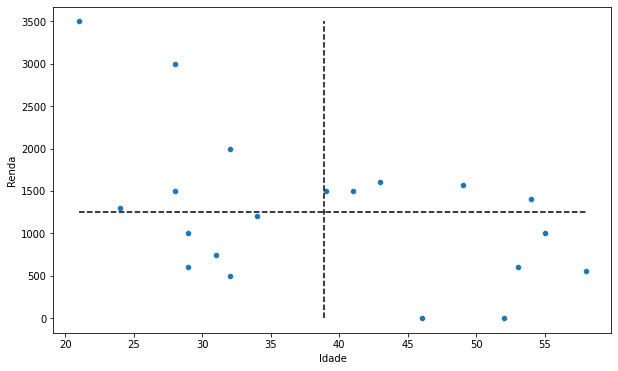

In [18]:
x = sample.Idade
y = sample.Renda

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean( ), xmin = x.min( ), xmax = x.max( ), colors = 'black', linestyles = 'dashed')
ax.vlines(x = x.mean( ), ymin = y.min( ), ymax = y.max( ), colors = 'black', linestyles = 'dashed')

We can see that there is more points in quadrants II and IV. Our scatter plot is biased to these quadrants. Now, let's see something with a positive covariance:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


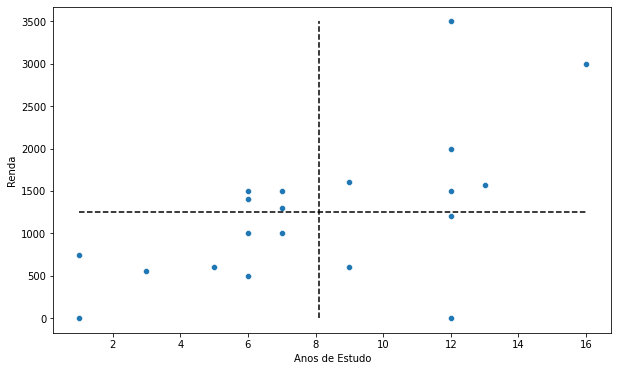

In [19]:
x = sample['Anos de Estudo']
y = sample.Renda

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean( ), xmin = x.min( ), xmax = x.max( ), colors = 'black', linestyles = 'dashed')
ax.vlines(x = x.mean( ), ymin = y.min( ), ymax = y.max( ), colors = 'black', linestyles = 'dashed')

Note that we might think that a high covariance is related to a strong linear association between features. However, a high covariance is often associated with the units considered in each feature.

For a better sense on stronger or weaker linear associations, we should use a measure with no unit: for instance, the Pearson correlation coefficient. 

## Pearson correlation coefficient

The Pearson correlation coefficient ($\rho$) is obtained by dividing the covariance to the product between the standard deviation of $x$ and the standard deviation of $y$. 

The correlation $\rho$ varies from -1 to +1. Values closer to -1 and +1 indicate a strong linear relation. 

**The correlation is a measure of the linear association between two variables, and not a measure of causality. A high correlation does not mean, necessarily, that variations in one of them will produce alterations in the other.**

\begin{equation}
\rho_{x y}=\frac{\sigma_{x y}}{\sigma_{x} \sigma_{y}}
\end{equation}
or, if we only have data for a sample:
\begin{equation}
r_{x y}=\frac{s_{x y}}{s_{x} s_{y}}
\end{equation}



So, let's evaluate the correlation between 'Altura' and 'Renda' (Height and Income, respectively):

In [20]:
s_xy = dataset[['Altura', 'Renda']].cov( ).Altura.loc['Renda']
sx   = dataset.Altura.std( )
sy   = dataset.Renda.std( )

r = s_xy/(sx*sy)
r

-0.004072608143399512

So, there is a very low linear association between 'Altura' and 'Renda' (Height and Income, respectively). We can also evaluate this factor using simply:

In [21]:
dataset[['Altura', 'Renda']].corr( )

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


# Using linear regression

When we use a linear regression, we define the linear function that best fits our data, according to a metric. Usually, the metric used is the ordinary least squares. 

The variable that is being predicted is denominated as the dependent variable ($y$), while the variable (or variables) being used to predict is the independent variable ($x$).

## Simple linear regression

Here, we will use a simple linear regression where we only consider one independent variable. Thus, the linear function will follow the equation:

\begin{equation}
y_i = \beta_1 + \beta_2 \, x_i
\end{equation}

When we fit a linear regression model, we define the model parameters $\beta_1$ and $\beta_2$. Here, $\beta_1$ is the intercept and $\beta_2$ is the angular coefficient.

So let's understand how can we fit our model:

In [22]:
data_income = {
    'Spending' : [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849],
    'Income' : [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632]
}

df = pd.DataFrame(data_income)
df.head( )

,Spending,Income
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


Identifying the relation between variables:

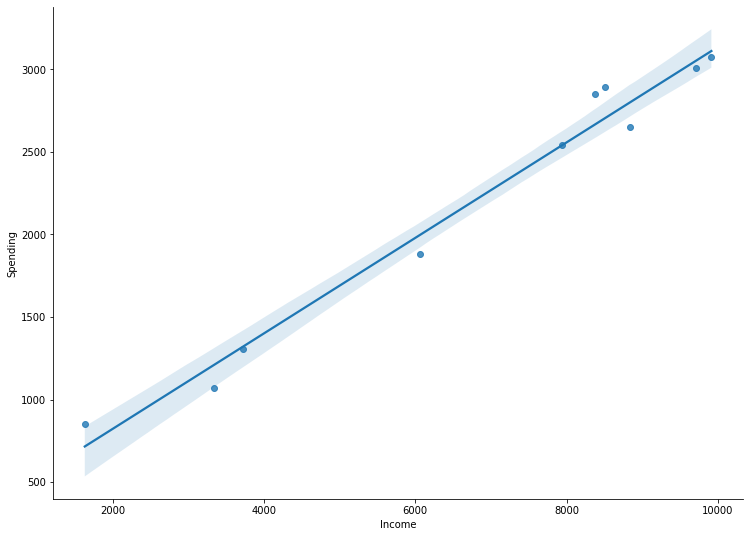

In [23]:
ax = sns.lmplot(x = 'Income', y = 'Spending', data = df)
ax.figure.set_size_inches(12, 8)

It seems that we have a strong linear association between these variables. Evaluation our correlation:

In [24]:
df.corr( )

,Spending,Income
Spending,1.000000,0.989013
Income,0.989013,1.000000


## Populational regression function

The equation for the linear regression is also known as the Populational Regression Function (PRF), and is often defined as:

\begin{equation}
E(Y|X_i) = \beta_1 + \beta_2 \, x_i
\end{equation}

Note that $\beta_1$ and $\beta_2$ are the parameters for the linear function:

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

Even though we are able to define a populational regression function, note that most data points lie outside of this linear function. That occurs because there are random errors, which are given by:

\begin{equation}
u_{i}=Y_{i}-E\left(Y \mid X_{i}\right)
\end{equation}

Here, $u_i$ is a random value that assumes positive or negative values. This is also known as the stochastical error term. Thus, in its stachastical form, we can also define the PRF as:

\begin{equation}
Y_i = \beta_1 + \beta_2 \, X_i + u_i
\end{equation}

## Least squares method

Since we are hardly able to evaluate the FRP, we should try to evaluate it using sample parameters:

\begin{equation}
Y_i = \hat{\beta}_1 + \hat{\beta}_2 \, X_i + \hat{u}_i
\end{equation}

where the prediction by the linear regression model is:

\begin{equation}
\hat{Y}_i = \hat{\beta}_1 + \hat{\beta}_2 \, X_i
\end{equation}

Thus, we can define the difference between the model and the sampled responses as:

\begin{equation}
Y_i - \hat{Y}_i = \hat{u}_i
\end{equation}

That way, we can define the model error at the $i$-th point is:

\begin{equation}
\hat{u}_i = Y_i - \hat{Y}_i
\end{equation}

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

An idea to fit the model would be to simple minimize the sum of errors:

\begin{equation}
\sum \hat{u}_i = \sum \left(Y_i - \hat{Y}_i\right)
\end{equation}

However, by doing this, negative errors would be nulified by positive errors. 

The idea of the least squares method is to find the regression line where the sum of the squared errors is the lowest. Thus, we minimize the function:

\begin{equation}
\sum \hat{u}_i^2 = \sum \left(Y_i - \hat{Y}_i\right)^2
\end{equation}




So, we can get the regression parameters using Least Square estimators for them. These are evaluated using the following equations:

\begin{equation}
\hat{\beta}_{2}=\frac{n \sum X_{i} Y_{i}-\sum X_{i} \sum Y_{i}}{n \sum X_{i}^{2}-\left(\sum X_{i}\right)^{2}}
\end{equation}

\begin{equation}
\hat{\beta}_{1} =\frac{\sum X_{i}^{2} \sum Y_{i}-\sum X_{i} \sum X_{i} Y_{i}}{n \sum X_{i}^{2}-\left(\sum X_{i}\right)^{2}} =\bar{Y}-\hat{\beta}_{2} \bar{X}
\end{equation}

So, let's find these estimators:

In [25]:
n = len(df)
n

10

In [26]:
sum_x = df.Income.sum( )
sum_y = df.Spending.sum( )

In [27]:
sum_x2 = df.Income.apply(lambda x : x**2).sum( )
sum_y2 = df.Spending.apply(lambda x : x**2).sum( )

In [28]:
sum_xy = df.apply(lambda data : data.Income*data.Spending, axis = 1).sum( )

In [29]:
beta_2 = (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x**2)
beta_2

0.28930296302148595

In [30]:
beta_1 = df.Spending.mean( ) - beta_2*df.Income.mean( )
beta_1

243.2304518979538

Ok, we have evaluated the model parameters by hand. However, we can also calculate them using statsmodels. We simply use:

In [31]:
import statsmodels.api as sm

Y = df.Spending
X = sm.add_constant(df.Income)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


And then, to fit the model:

In [32]:
reg_result = sm.OLS(Y, X, missing = 'drop').fit( )

Nice! We have fitted our model. The fitted parameters are:

In [33]:
reg_result.params

const     243.230452
Income      0.289303
dtype: float64

Nice! These are the same as the ones we evaluated by hand.

Note that we evaluate the estimates for the populational parameters for linear regression. Thus, we can actually define a confidence interval for these parameters. Using statsmodels, we can do:

In [34]:
reg_result.conf_int(alpha = 0.05)

,0,1
const,-16.096224,502.557128
Income,0.254048,0.324558


Note that, since we only have 10 data points, our interval is very large!

## Predicting values using a linear regression

Now that we have built our model, we can use it to predict values. To do so, we simply have to use equation:

\begin{equation}
\hat{Y}_i = \hat{\beta}_1 + \hat{\beta}_2 \, \hat{X}_i = 243.23 + 0.29 \, \hat{X}_i
\end{equation}

First, let's try to predict values from the points we found in our sample. We can simply do:

In [35]:
df['Y_pred'] = beta_1 + beta_2 * df.Income
df

,Spending,Income,Y_pred
0,3011,9714,3053.519435
1,1305,3728,1321.751898
2,1879,6062,1996.985014
3,2654,8845,2802.115160
4,2849,8378,2667.010676
5,1068,3338,1208.923742
6,2892,8507,2704.330758
7,2543,7947,2542.321099
8,3074,9915,3111.669330
9,849,1632,715.372888


Alternatively, we can also simply do:

In [36]:
df['Y_pred'] = reg_result.predict( )
df

,Spending,Income,Y_pred
0,3011,9714,3053.519435
1,1305,3728,1321.751898
2,1879,6062,1996.985014
3,2654,8845,2802.115160
4,2849,8378,2667.010676
5,1068,3338,1208.923742
6,2892,8507,2704.330758
7,2543,7947,2542.321099
8,3074,9915,3111.669330
9,849,1632,715.372888


Note that the result found is the same. Nice!

Now, usually, we want to make predictions on other points. Thus, we can do:

In [37]:
beta_1 + beta_2 * 7510

2415.8957041893136

Thus, for an income of 7510, we would get a spending of 2415.89. We can also evaluate this using the *predict( )* function from statsmodels:

In [38]:
reg_result.predict([1, 7510])

array([2415.89570419])

Nice! The values found are the same.

# Residuals and tests

When we fit a model, even though we try to minimize the errors at the data points, we rarely are able to nulify them. These errors are known as residuals. Taking the prediction at the sampling points, we can also evaluate the residuals:

In [39]:
df['u'] = df['Spending'] - df['Y_pred']
df

,Spending,Income,Y_pred,u
0,3011,9714,3053.519435,-42.519435
1,1305,3728,1321.751898,-16.751898
2,1879,6062,1996.985014,-117.985014
3,2654,8845,2802.115160,-148.115160
4,2849,8378,2667.010676,181.989324
5,1068,3338,1208.923742,-140.923742
6,2892,8507,2704.330758,187.669242
7,2543,7947,2542.321099,0.678901
8,3074,9915,3111.669330,-37.669330
9,849,1632,715.372888,133.627112


Using statsmodels, we can simply do:

In [40]:
df['u'] = reg_result.resid
df

,Spending,Income,Y_pred,u
0,3011,9714,3053.519435,-42.519435
1,1305,3728,1321.751898,-16.751898
2,1879,6062,1996.985014,-117.985014
3,2654,8845,2802.115160,-148.115160
4,2849,8378,2667.010676,181.989324
5,1068,3338,1208.923742,-140.923742
6,2892,8507,2704.330758,187.669242
7,2543,7947,2542.321099,0.678901
8,3074,9915,3111.669330,-37.669330
9,849,1632,715.372888,133.627112


Now, we should remember some premises for the error $u$:

*   The residual $u$ is a random variable with mean equal to 0.
*   Variance of $u$ is the same for all values of X.
*   All residuals are independent.
*   The residual $u$ follows a Normal distribution.

These premises are very important for the tests we are going to perform in the following. For instance, let's take the mean of the residuals:





In [41]:
df.u.mean( )

0.0

Indeed, the mean of the residuals is 0. Let's also plot the residuals of the model:

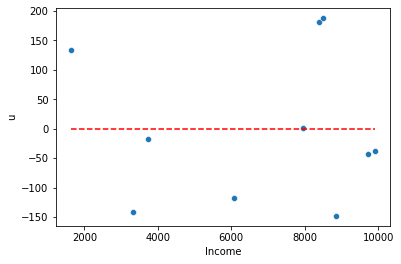

In [42]:
ax = sns.scatterplot(x = df.Income, y = df.u)
ax.hlines(y = 0.0, xmin = df.Income.min( ), xmax = df.Income.max( ), colors = 'red', linestyles = 'dashed')

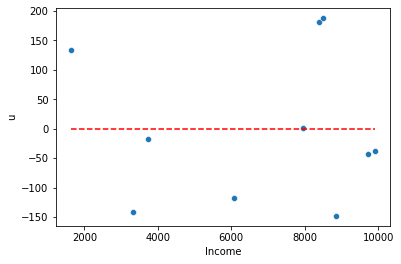

In [43]:
ax = sns.scatterplot(x = df.Income, y = df.u)
ax.hlines(y = 0.0, xmin = df.Income.min( ), xmax = df.Income.max( ), colors = 'red', linestyles = 'dashed')

Note that, indeed, the residuals seem to be random for different incomes.

Note that the $i$-th residual is given by:

\begin{equation}
\hat{u} = Y_i - \hat{Y}_i
\end{equation}

Thus, if we want to understand how well the data is fitted to the regression line, we can evaluate the sum of the square residuals:

\begin{equation}
S = \sum \hat{u}_i^2 = \sum \left(Y_i - \hat{Y}_i\right)^2
\end{equation}

Such as:

In [44]:
df['u2'] = df.u.apply(lambda x : x**2)
df

,Spending,Income,Y_pred,u,u2
0,3011,9714,3053.519435,-42.519435,1807.902326
1,1305,3728,1321.751898,-16.751898,280.626088
2,1879,6062,1996.985014,-117.985014,13920.463466
3,2654,8845,2802.115160,-148.115160,21938.100569
4,2849,8378,2667.010676,181.989324,33120.114017
5,1068,3338,1208.923742,-140.923742,19859.501190
6,2892,8507,2704.330758,187.669242,35219.744272
7,2543,7947,2542.321099,0.678901,0.460907
8,3074,9915,3111.669330,-37.669330,1418.978442
9,849,1632,715.372888,133.627112,17856.205182


In [45]:
df.u2.sum( )

145422.0964585235

Or we can also evaluate this using:

In [46]:
reg_result.ssr

145422.0964585235

However, it is hard to interpret this value, and its hard to compare it to other regression lines because it is not adimensional. Also, it increases if we have more data points. Thus, usually, to discuss the fit of a given regression line, we usually use another parameter:

## The determination coefficient

The determination coefficient says how good the regression line is fitted to the data. It can be obtained by:

\begin{equation}
R^{2}=\frac{\left[\sum\left(Y_{i}-\bar{Y}\right)\left(\hat{Y}_{i}-\bar{Y}\right)\right]^{2}}{\sum\left(Y_{i}-\bar{Y}\right)^{2} \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2}}
\end{equation}

**Only using the $R^2$, we can't infer that the association between $X$ and $Y$ is statistically significant. To infer this, we should look to the sample size and to the least squares estimators.**

Now, let's evaluate our determination coefficient:


In [47]:
reg_result.rsquared

0.9781470674757309

## Tests using the Regression model

So, we have fitted the regression model, and showed how to use the determination coefficient to understand how well the regression line is fitted to the data. Now, let's see how we can apply hipothesis tests to our regression line to understand if the regression is significative.

Basically, the idea here is to understand if $\beta_2$ can be 0.0. The $\beta_2$ is the angular coefficient, and it being 0.0 means that there is no linear relationship between the variables.


First, let's see the output of our regression model:

In [48]:
print(reg_result.summary( ))

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     358.1
Date:                Thu, 26 May 2022   Prob (F-statistic):           6.29e-08
Time:                        20:54:19   Log-Likelihood:                -62.113
No. Observations:                  10   AIC:                             128.2
Df Residuals:                       8   BIC:                             128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.2305    112.457      2.163      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Here, we see that we already have the interval of confidence for both parameters. However, we will understand how to evaluate this.

## Mean Squared Error

Before, we saw that Sum of Square Residuals (SSR) gave us a dimensional idea of how our regression line fits to our data. The Mean Squared Error (MSE) is evaluated by dividing the SSR by the number of degrees of freedom. Since we have 2 parameters, we have $n - 2$ degrees of freedom.

In [49]:
df.u2.sum( )/(df.shape[0] - 2)

18177.762057315438

We can evaluate this using:

In [50]:
reg_result.mse_resid

18177.762057315438

## Test for the angular coefficient

Ok, we have an estimate for the MSE ($s^2$). Now, let's use a test for the angular coefficient. Here, we want to see if the angular coefficient is different from 0, which would mean that there is a linear association between the data. Thus, we can formulate the hypotheses as:

\begin{equation}
H_0 : \beta_2 = 0
\end{equation}

\begin{equation}
H_1 : \beta_2 \neq 0
\end{equation}

So, if the null hypothesis is rejected, there is an statistically significant linear relation between the variables. 

Our test statistics can be evaluated using:

\begin{equation}
s_{b_{2}}=\frac{s}{\sqrt{\sum\left(X_{i}-\bar{X}\right)^{2}}}
\end{equation}

\begin{equation}
t=\frac{\beta_{2} - b_2}{s_{b_{2}}}
\end{equation}

which follows a t-Student distribution with $n - 2$ degrees of freedom. Here, since we are testing if $\beta_2$ is different from 0, $b_2 = 0$. Let's test it:

In [53]:
import numpy as np

s = np.sqrt(reg_result.mse_resid)
s

134.82493114151936

In [55]:
denom = df.Income.apply(lambda x : (x - df.Income.mean( ))**2).sum( )
denom = np.sqrt(denom)
denom

8818.800848187922

In [56]:
sb2 = s/denom
sb2

0.015288351949712418

Here, we will consider a test significance of 5%:

In [63]:
from scipy.stats import t as t_student

significance = 0.05
dof = df.shape[0] - 2
t_alpha = t_student.ppf(1 - significance/2, dof)
t_alpha

2.3060041350333704

Now, let's get our test statistics:

In [71]:
beta_2 = reg_result.params[1]
b2 = 0

t = (beta_2 - b2)/sb2
t

18.923096745357686

This can also be found using:

In [70]:
reg_result.tvalues

const      2.162872
Income    18.923097
dtype: float64

Thus, since $t > t_\alpha$, we reject the null hypothesis! We can also reach the same conclusion using the p-value:

In [75]:
p_value = 2*(1 - t_student.cdf(abs(t), dof))
p_value

6.291133991531694e-08

Or, using the result from the regression:

In [77]:
p_value = reg_result.pvalues
p_value

const     6.250903e-02
Income    6.291134e-08
dtype: float64

Nice! It worked. Thus, since the p-value is lower than the test significance, we reject the null hypothesis!

This test is very important when we consider multiple independent variables in our model, since we are able to define which features really help the model.

## Test F

The test F tests multiple parameters at once. It has very little importance in simple linear regression models (with only one independent variable). In our case, the test result is the same from the test we did before. 

Thus, the test F tests if all parameters can be null. The test statistics is:

\begin{equation}
F = \dfrac{\dfrac{SSR}{k}}{\dfrac{SSE}{n - k -1}}
\end{equation}

where SSR is the sum of squares due to regression, SSE is the sum of squares due to the error, and $k$ is the number of model degrees of freedom (number of parameters minus 1). For the simple linear regression, the test is the same:

\begin{equation}
H_0 : \beta_2 = 0
\end{equation}

\begin{equation}
H_1 : \beta_2 \neq 0
\end{equation}

In [78]:
ssr_over_k = reg_result.mse_model
ssr_over_k

6509158.303541476

In [79]:
ssr_over_nk1 = reg_result.mse_resid
ssr_over_nk1

18177.762057315438

In [80]:
F = ssr_over_k/ssr_over_nk1
F

358.08359043416664

We can also simply evaluate F by:

In [81]:
reg_result.fvalue

358.08359043416664

Now, let's evaluate the p-value:

In [84]:
from scipy.stats import f

k = 1

p_value = f.sf(F, k, dof)
p_value

6.291133978284327e-08

Thus, since the p_value is lower than the test significance, we reject the hypothesis that our model parameters are 0.0.

We can find this and much more using the summary:

In [88]:
print(reg_result.summary( ))

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     358.1
Date:                Thu, 26 May 2022   Prob (F-statistic):           6.29e-08
Time:                        21:30:43   Log-Likelihood:                -62.113
No. Observations:                  10   AIC:                             128.2
Df Residuals:                       8   BIC:                             128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.2305    112.457      2.163      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Note that, using the summary, there are a lot of other tests. Let's see some of them.

## Other tests

We considered that the residuals follow a normal distribution. So, there are tests to see if these actually follow a normal distribution. Thus, let's test it:

In [90]:
from scipy.stats import normaltest

normaltest(df.u)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.5617737881245928, pvalue=0.45799963396913657)

So, here, we can see the test statistics and the p_value. Note that our p_value is higher than the test significance, which means that we do not have sufficient information to say that our residuals do not follow a Normal. 

This test is the Omnibus test from the model summary. Note that the test statistics is the same:

In [93]:
print(reg_result.summary( ))

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     358.1
Date:                Thu, 26 May 2022   Prob (F-statistic):           6.29e-08
Time:                        21:37:01   Log-Likelihood:                -62.113
No. Observations:                  10   AIC:                             128.2
Df Residuals:                       8   BIC:                             128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.2305    112.457      2.163      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


To test for the normality of our variable, we can also use a probplot. If our data follows a normal, our ordered values will be very close to the theoretical line:

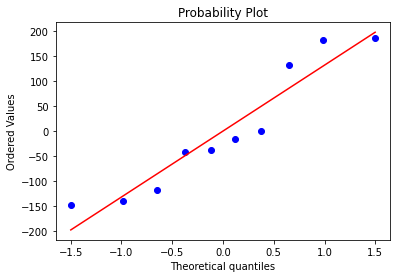

In [94]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

(_, (_, _, _)) = probplot(df.u, plot = plt)

## Verifying the simmetry

We can also verify the simmetry of the distribution of the residuals. This is done using the skew:

In [96]:
from scipy.stats import skew

S = skew(df.u)
S

0.4104426939916289

Negative skew refers to a longer or fatter tail on the left side of the distribution, while positive skew refers to a longer or fatter tail on the right. Thus, our data is slightly right-skewed.


## Verifying the kurtosis

Kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution.

In [100]:
from scipy.stats import kurtosis

kurtosis(df.u)

-1.2357151841311869

Note that the value shown in the summary is actually:

In [101]:
C = 3 + kurtosis(df.u)
C

1.7642848158688131

which is employed in the Jarque-Bera test.

## Jarque-Bera test

The Jarque-Bera test tests the hypothesis that:

\begin{equation}
H_0 : \text{Data follows a Normal distribution}
\end{equation}

\begin{equation}
H_1 : \text{Data does not follow a Normal distribution}
\end{equation}

The test statistics is evaluated using:

\begin{equation}
J B=\frac{n}{6}\left(S^{2}+\frac{1}{4}(C-3)^{2}\right)
\end{equation}
where $n$ is the number of observations, $S$ is the skewness coefficient, and $C$ is the kurtosis coefficient.

In [103]:
n = df.shape[0]

JB = (n/6)*(S**2 + (1/4)*(C - 3)**2)
JB

0.9170186818736653

This statistics follows a chi-squared distribution. Thus, we can test it using:

In [104]:
from scipy.stats import chi2

p_value = chi2.sf(JB, 2)
p_value

0.6322253759196355

Since the p_value is higher than the test significance, we accept the null hypothesis that our residuals follow a Normal. In some books, we can find a correction to the Jacque-Bera test, where:

\begin{equation}
J B=\frac{n - k}{6}\left(S^{2}+\frac{1}{4}(C-3)^{2}\right)
\end{equation}

where $k$ is the number of model parameters. Thus, using the correction:

In [105]:
k = 1

JB = ((n - k)/6)*(S**2 + (1/4)*(C - 3)**2)
JB

0.8253168136862987

In [106]:
p_value = chi2.sf(JB, 2)
p_value

0.6618883407435288

We still come to the same conclusion.

In [112]:
%reset -f

# Applications: Beer consumption in São Paulo

Now, we will do an application of what we have learned until now. In this application, we will use a dataset from kaggle related to the beer consumption in São Paulo. So, we will analyze how the average temperature is related to the beer consumption. First, let's import the libraries we will use:

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import probplot

Now, let's import our dataset:

In [128]:
beer = pd.read_csv('dados_projeto.csv', sep = ';')
beer

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82
...,...,...
360,32307,24.00
361,26095,22.64
362,22309,21.68
363,20467,21.38


So, in our dataframe, we have to variables: beer consumption and the average temperature.

In our model, we will consider that beer consumption is the dependent variable ($Y$), while the average temperature is the independent variable ($X$).

## Descriptive statistics

First, let's get some descriptive statistics of our data:

In [129]:
beer.describe( )

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


So, our mean temperature is 21.22 °C, and our mean beer consumption is 25401.37. We have 365 entries in our data. The temperature varies from 12.9°C to 28.9 °C, a very high interval.


## Visualizing the data

Let's draw a boxplot for each variable:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Temperature')

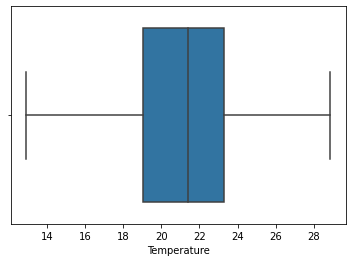

In [130]:
ax = sns.boxplot(beer.X)
ax.set_xlabel('Temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Beer consumption')

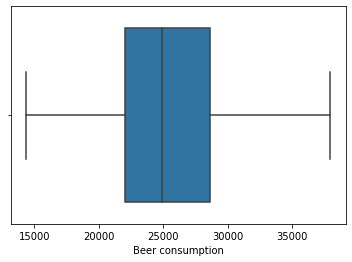

In [131]:
ax = sns.boxplot(beer.Y)
ax.set_xlabel('Beer consumption')

It seems that temperature is slightly left-skewed, while beer consumption is slightly right skewed. Let's draw histograms:

Text(0.5, 0, 'Temperature')

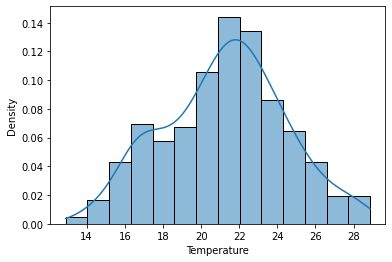

In [132]:
ax = sns.histplot(beer.X, stat = 'density', kde = True)
ax.set_xlabel('Temperature')

Text(0.5, 0, 'Beer consumption')

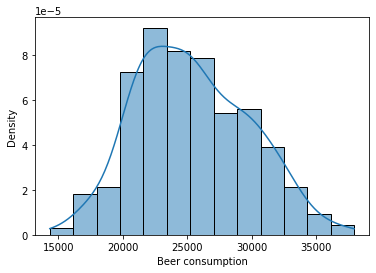

In [133]:
ax = sns.histplot(beer.Y, stat = 'density', kde = True)
ax.set_xlabel('Beer consumption')

Actually, these distributions both differ from a normal. Let's try to use a normal test (considering a test significance of 5%):

In [134]:
normaltest(beer.X)

NormaltestResult(statistic=3.9990731799105546, pvalue=0.13539801350006445)

For the temperature, we actually do not have sufficient information to reject the null hypothesis that the distribution of data follows a Normal.

In [135]:
normaltest(beer.Y)

NormaltestResult(statistic=7.856463544239466, pvalue=0.019678437769899134)

For the beer consumption, however, since the p-value is lower than the test significance, we reject the hypothesis that these are drawn from a Normal distribution.

## Analyzing if there is a linear association between data

Now, let's analyze if there is a linear association between the variables. First, let's draw a scatter plot:

Text(0, 0.5, 'Beer consumption')

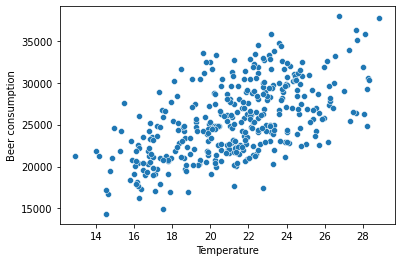

In [136]:
ax = sns.scatterplot(x = beer.X, y = beer.Y)
ax.set_xlabel('Temperature')
ax.set_ylabel('Beer consumption')

Indeed, it seems that, as the temperature grows, the beer consumption also increases. We can also attest this from the correlation matrix:

In [137]:
beer.corr( )

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


Our correlation coefficient is not that high ($r = 0.57$). However, it still attests that there is a linear association between the data. **However, this does not mean, necessarily, that there is a relation of causality between the temperature and the beer consumption.**

## Performing the linear regression

Finally, let's define our linear regression model. We can do this by:

In [139]:
Y = beer.Y
X = sm.add_constant(beer.X)

model_fit = sm.OLS(Y, X, missing = 'drop').fit( )

print(model_fit.summary( ))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.87e-33
Time:                        22:25:20   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Nice! we have fitted our model. Now, let's use it to predict the beer consumption at the data points:

In [142]:
beer['Y_pred'] = model_fit.predict( ).round(2)
beer

,Y,X,Y_pred
0,25461,27.30,30229.20
1,28972,27.02,30006.63
2,30814,24.82,28257.89
3,29799,23.98,27590.19
4,28900,23.82,27463.01
...,...,...,...
360,32307,24.00,27606.09
361,26095,22.64,26525.05
362,22309,21.68,25761.96
363,20467,21.38,25523.50


Note that we can also predict values that are not from our original sample. For instance, according to our model, what would be the beer consumption in a day where the temperature is 42 °C?

In [158]:
model_fit.predict([1, 42])

array([41913.97383817])

It would be 41913.97!

Nice!, now, let's visualize the result from our regression:

Text(0, 0.5, 'Beer consumption')

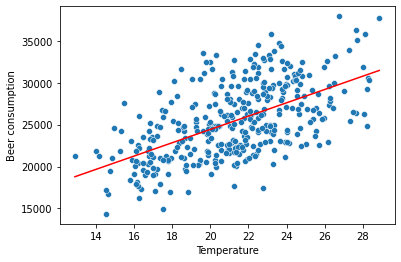

In [147]:
ax = sns.scatterplot(x = beer.X, y = beer.Y)
sns.lineplot(x = beer.X, y = beer.Y_pred, color = 'red')
ax.set_xlabel('Temperature')
ax.set_ylabel('Beer consumption')

Nice! Now, let's evaluate the residuals and make a QQPlot for such residuals:

In [149]:
beer['u'] = beer.Y - beer.Y_pred
beer['u2'] = beer.u.apply(lambda x : x**2)
beer

,Y,X,Y_pred,u,u2
0,25461,27.30,30229.20,-4768.20,2.273573e+07
1,28972,27.02,30006.63,-1034.63,1.070459e+06
2,30814,24.82,28257.89,2556.11,6.533698e+06
3,29799,23.98,27590.19,2208.81,4.878842e+06
4,28900,23.82,27463.01,1436.99,2.064940e+06
...,...,...,...,...,...
360,32307,24.00,27606.09,4700.91,2.209855e+07
361,26095,22.64,26525.05,-430.05,1.849430e+05
362,22309,21.68,25761.96,-3452.96,1.192293e+07
363,20467,21.38,25523.50,-5056.50,2.556819e+07


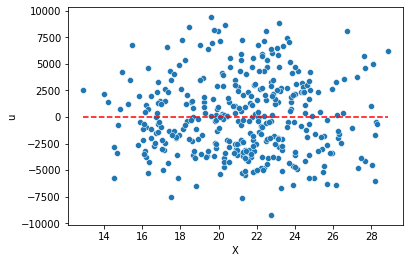

In [151]:
ax = sns.scatterplot(x = beer.X, y = beer.u)
ax.hlines(y = 0.0, xmin = beer.X.min( ), xmax = beer.X.max( ), colors = 'red', linestyles = 'dashed')

Our residuals actually seem to be very simmetric to $y = 0$. 

However, doing the QQPlot:

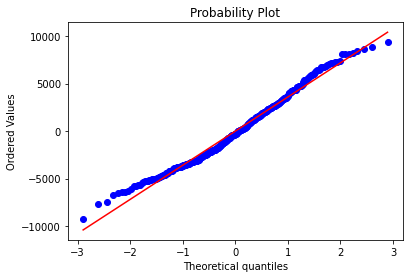

In [164]:
(_, (_, _, _)) = probplot(beer.u, plot = plt)



We actually find that our residuals differ from a Normal in some points. If we test the normality for such residuals:

In [152]:
normaltest(beer.u)

NormaltestResult(statistic=11.299699606697924, pvalue=0.0035180451338295685)

We actually reject the null hypothesis that the residuals follow a normal distribution.

Now, let's get the determination coefficient $R^2$:

In [155]:
model_fit.rsquared

0.330182049332432

Again, the $R^2$ is not that high. However, it still shows that there is at least some linear association between the data points. 

Finally, using the summary( ) we can also see some test statistics:

In [157]:
print(model_fit.summary( ))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.87e-33
Time:                        22:35:58   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

For instance, the p-value for our $X$ variable is very low, which shows that there is a linear association between data. Also, we can see the same result we found previously for the normal test on the residuals (the p-value is the Prob(Omnibus)). Here, we also see the result for the Jarque-Bera test, which also shows that the residual distribution is not a Normal.